##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [ ]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")
voters

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


My project aims to analyze voter registration and out of curiosity uncover the trends that impact the amount or location of people that become new voters in the United States. The data of has its implications such as if there is an imortant election race in the year, or if there is external factors that could affect the amount of people that register for the first time. A national question that I would like to explore is if 2016 or 2020 had more newly registered voters. A state question that I am interested in is which state had the most new voters in 2016 and 2020. I hope that people who read this notebook could walk out with new knowledge about our countries' voter trends.

In [ ]:
voters.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Jurisdiction refers to the state that people are registering to.
Year is the year that they registered.
Month is the month that they registered.
New registered voters is the amount of people that newly registered to vote in the timeframe.

In [ ]:
voters_missing = voters.isnull().sum()
voters_missing

,0
Jurisdiction,0
Year,0
Month,0
New registered voters,0


In [ ]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


In [ ]:
voters2 = voters.rename(columns={"Jurisdiction":"NAME"})
voters_clean = voters2.rename(columns={"New registered voters":"registered_voters"})
voters_clean

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


The main limitation that I can see at this point is that there is no column of data that gives any potential answers to the "why" questions. We can only answer some questions based on what we can see from the data. I would have also liked to see the state abbreviations as well to make graphing and plotting easier. After looking into it there are many states missing from the data which makes the national themed research rather pointless with only 12 states a part of the dataset.

In [ ]:
top_new_registration = voters_clean["registered_voters"].sort_values(ascending = False)
top_new_registration

,registered_voters
13,238281
11,185478
14,176810
10,174278
88,170607
...,...
30,2535
39,2225
41,1925
40,1281


In [ ]:
voters_clean.iloc[13]

,13
NAME,California
Year,2020
Month,Feb
registered_voters,238281


California in row 13 was the highest new registration. During February 2020 they had 238,281 new voters.

In [ ]:
avg_voter_registration = voters_clean["registered_voters"].mean()
avg_voter_registration

48223.46226415094

The average voter registration was 48,223.5 people per month.

In [ ]:
high_voters = voters_clean.loc[voters_clean.registered_voters > 48223]
high_voters.tail()

,NAME,Year,Month,registered_voters
89,Texas,2016,Apr,143199
90,Texas,2016,May,91205
91,Texas,2020,Jan,134559
92,Texas,2020,Feb,130080
93,Texas,2020,Mar,129424


New registered voters were above average 93 times.

In [ ]:
states_nat_avg = high_voters["NAME"].value_counts()
states_nat_avg.sort_values(ascending = False)

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


  Texas went above the national average on the most occasions  with the rest of the states trailing behind.

In [ ]:
highest_nat_avg = voters_clean.groupby("NAME")["registered_voters"].mean()
highest_nat_avg.sort_values(ascending = False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


The states with the highest average voter registration were California, Texas, and Florida.

In [ ]:
total_reg_states = voters_clean.groupby("NAME")["registered_voters"].sum()
total_reg_states_frame = total_reg_states.to_frame()

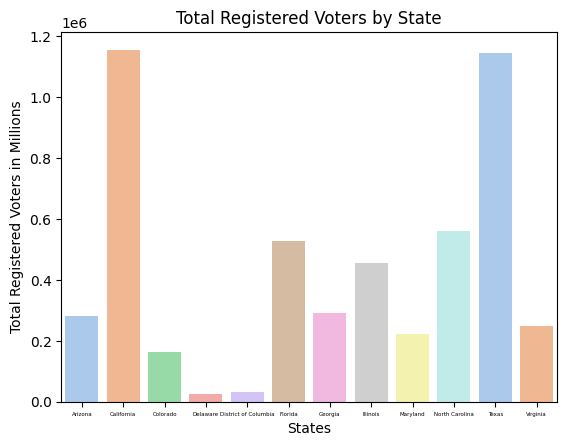

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.barplot(total_reg_states_frame, x="NAME", y ="registered_voters", hue = "NAME", palette = "pastel")
plt.ylabel("Total Registered Voters in Millions")
plt.xlabel("States")
plt.xticks(fontsize = 4)
plt.title("Total Registered Voters by State")
plt.figure(figsize=(10, 10))
plt.show()

The main trend is the expected fact that the larger population states such as California and Texas have more registered voters than the others. Florida's total is catching my attention because it feels low to me.

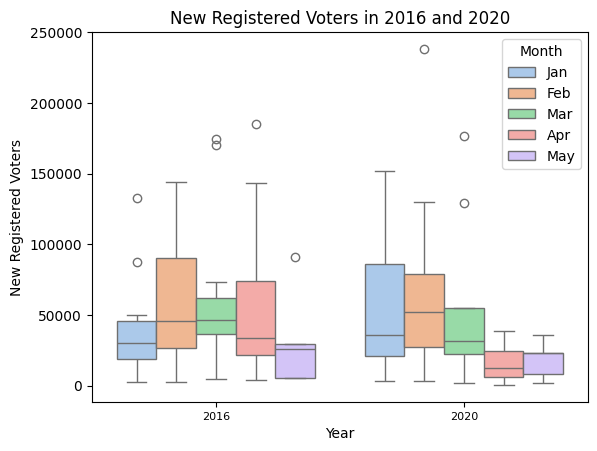

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.boxplot(voters_clean, x="Year", y ="registered_voters", hue = "Year", palette = "pastel")
plt.ylabel("New Registered Voters")
plt.xlabel("Year")
plt.xticks(fontsize = 8)
plt.title("New Registered Voters in 2016 and 2020")
plt.figure(figsize=(10, 10))
plt.show()

There is a very noticeable drop in newly registered voters starting in March which I presume is the start of the pandemic in the country. The February stats seem high to me compared to what you would expect from a month that only has 29 days on election years.

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

In [ ]:
nat_year_voters = voters_clean.groupby("Year")["registered_voters"].sum()
nat_year_voters_frame = nat_year_voters.to_frame()
nat_year_voters

,registered_voters
Year,
2016,2753642
2020,2358045


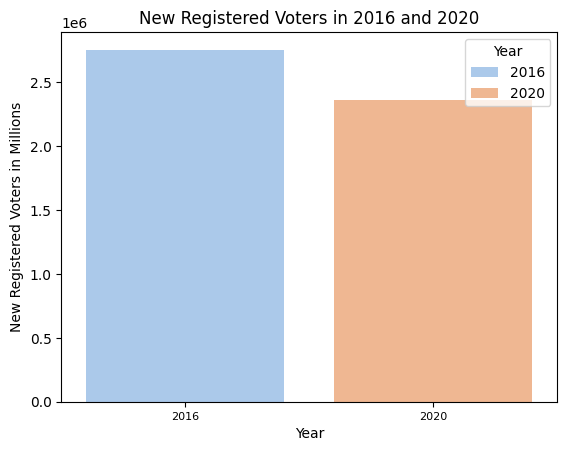

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.barplot(nat_year_voters_frame, x="Year", y ="registered_voters", hue = "Year", palette = "pastel")
plt.ylabel("New Registered Voters in Millions")
plt.xlabel("Year")
plt.xticks(fontsize = 8)
plt.title("New Registered Voters in 2016 and 2020")
plt.figure(figsize=(10, 10))
plt.show()

I have my answer to my national question. 2016 logged roughly half a million more new voters than 2020 in the United states. I hypothesize that the Covid-19 pandemic played a huge part in the outcome of that data.

In [ ]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 11.02 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

In [ ]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358

In [ ]:
bbox = states.cx[minx:maxx, miny:maxy]

In [ ]:
voters_clean["avg_votes_state"]=voters_clean.groupby("NAME")["registered_voters"].mean()
avg_votes_state

,registered_voters
NAME,
Arizona,35311.500
California,144545.375
Colorado,20527.500
Delaware,3166.375
District of Columbia,3248.400
Florida,65868.125
Georgia,36604.125
Illinois,56840.375
Maryland,22133.500


In [ ]:
voters_clean.columns

Index(['NAME', 'Year', 'Month', 'registered_voters', 'avg_votes_state'], dtype='object')

In [ ]:
bbox.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [ ]:
avg_states = bbox.merge(voters_clean, on="NAME", how="inner")
avg_states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Year,Month,registered_voters,avg_votes_state
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",2016,Jan,35213,NaN
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",2016,Feb,84357,NaN
2,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",2016,Mar,58272,NaN
3,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",2016,Apr,73341,NaN
4,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",2016,May,29374,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ...",2016,Apr,3818,NaN
102,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ...",2020,Jan,3276,NaN
103,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ...",2020,Feb,3353,NaN
104,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ...",2020,Mar,2535,NaN


Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

<ipython-input-115-e2632d59a5c5>:3: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  avg_states.plot(column="registered_voters",ax=ax,legend=True,color ="red",linewidth=.25, edgecolor="black",


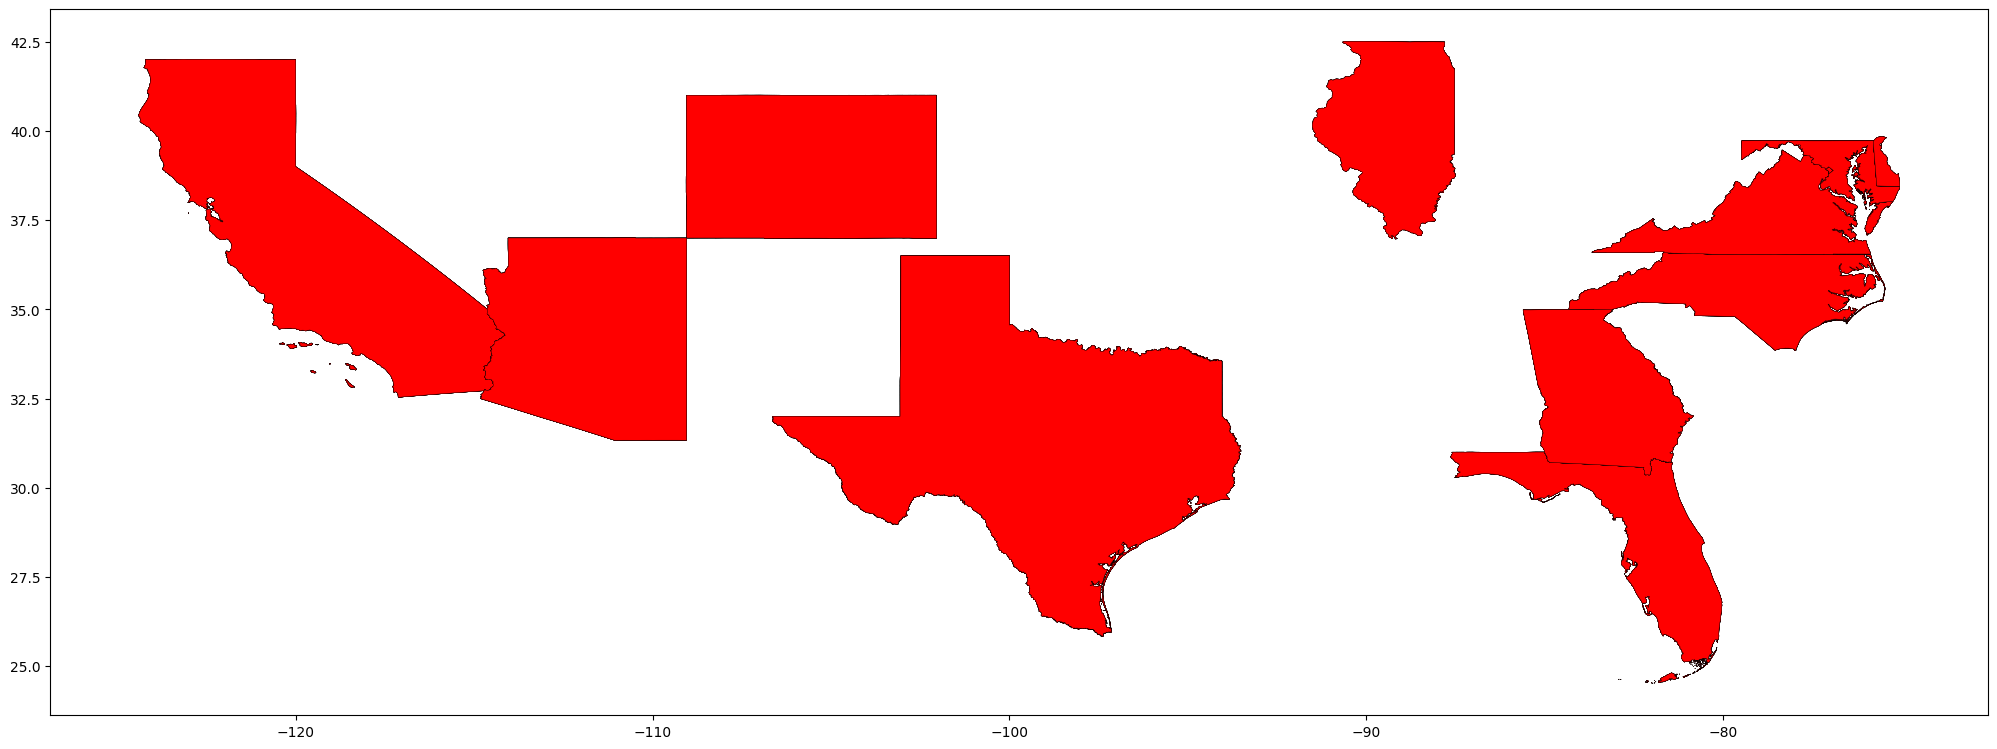

In [ ]:
fig=plt.figure(1,figsize=(25,15))
ax=fig.add_subplot()
avg_states.plot(column="registered_voters",ax=ax,legend=True,color ="red",linewidth=.25, edgecolor="black",
                legend_kwds={"label": "Number of Registered Voters",
            "orientation": "horizontal"})
plt.title = "States with Registered Voter Information"
plt.show()

My research questions were answered by the graphs and maps that I made. I think that from a graph makers point of view, the plots were smooth and showed exactly what I intended to show. I was able to find results that supported my hypothesis that 2016 would have more newly registered voters than 2020 and the hypothesis that Texas and California would have the highest amounts of newly registered voters.

For the client that is viewing my notebook, there is an interesting path to take with the data where February showed high numbers of newly registered voters in both years. That could be something to look into from a scholar point of view because I have honestly no guess on what the reasoning behind those numbers could be. Another suggestion to the client would be to take any findings with a grain of salt because plenty of important data is missing from 38 of the 50 states to use any if the research found.

My next step with the project  after finding the data for the rest of the states would be to find data on the Covid-19 pandemic. My hypothesis is that the pandemic and lockdown caused the decline in newly registered voters starting in March 2020. I am sure that there is data somewhere that supports that theory.  

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Matthew D'Angelo